In [1]:
import pandas as pd
import numpy as np

### Load the predicted IL properties database for all 8,333,096 synthetically feasible ILs

First, download 'predicted_IL_properties.csv' from [here](https://drive.google.com/drive/folders/11CJsfLyEy6frgaN934M_JpKo4YlR_6_i?usp=sharing) and put it under `ILTransR/IL screening`.

One can also do predictions with IL SMILES provieded in 'ONLY_SMILES.csv' with the notebooks provided in `ILTransR/examples`.

In [2]:
IL_properties = pd.read_csv("predicted_IL_properties.csv",index_col=0)

### Apply the constraints 

In [4]:
df_Screening = IL_properties[(IL_properties["viscosity"]<100) & (IL_properties["TOX"]>3) & (IL_properties["MP"]<298)&(IL_properties["TD"]>150)]

In [5]:
df_Screening

,IL_SMILES,CP,MP,TOX,T298KP1bar_Xco2,T328KP1bar_Xco2,viscosity,TD,(T298KP1bar-T328KP1bar)/T298KP1bar
3219685,CCCNCC[N+](CC)(CC)CC.N#C[N-]C#N,539.038124,296.91864,3.484596,0.070409,0.017505,76.850348,212.54073,0.751379
3252213,CCC[N+](CCN(CC)CC)(CC)CC.N#C[N-]C#N,630.813969,292.92496,3.407267,0.036025,0.000642,94.401721,263.31567,0.982173
3257267,COCC[N+](CC)(CC)CC.N#C[N-]C#N,487.286526,285.91986,3.135359,0.048460,0.005622,48.697749,169.71434,0.883978
3257270,COCC[N+](CC)(CC)CC.[O-]c1ccccc1,436.800819,297.32846,3.218563,0.011480,0.000000,76.324012,167.67313,1.000000
3257293,CCC[N+](CCOC)(CC)CC.FC(S(=O)(=O)[N-]S(=O)(=O)C...,635.712362,282.40967,3.481759,0.063220,0.027500,80.908186,188.00998,0.565008
3257305,CCC[N+](CCOC)(CC)CC.N#C[N-]C#N,541.491842,262.31442,3.109527,0.046498,0.004468,59.354818,185.37800,0.903911
3257308,CCC[N+](CCOC)(CC)CC.[O-]c1ccccc1,495.016453,284.65770,3.263948,0.011140,0.000000,72.262477,174.41005,1.000000
3257343,CCCC[N+](CCOC)(CC)CC.N#C[N-]C#N,577.751185,262.85050,3.213156,0.036749,0.000826,74.321925,183.15184,0.977536
3257346,CCCC[N+](CCOC)(CC)CC.[O-]c1ccccc1,514.047668,291.18770,3.343860,0.011666,0.000000,84.457969,170.19008,1.000000
3257521,CCOCC[N+](CCOCC)(CC)CC.FC(S(=O)(=O)[N-]S(=O)(=...,681.908647,284.12177,3.424596,0.071991,0.029720,83.675816,165.99461,0.587177


### Generation of Figure 4a

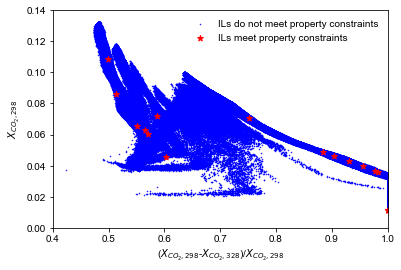

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

IL_properties["(T298KP1bar-T328KP1bar)/T298KP1bar"] = (IL_properties["T298KP1bar_Xco2"]-IL_properties["T328KP1bar_Xco2"])/IL_properties["T298KP1bar_Xco2"]

plt.rcParams["font.family"] = "Arial"
plt.scatter(IL_properties["(T298KP1bar-T328KP1bar)/T298KP1bar"], IL_properties["T298KP1bar_Xco2"],c='b',marker='.',s=1)
plt.scatter(df_Screening["(T298KP1bar-T328KP1bar)/T298KP1bar"], df_Screening["T298KP1bar_Xco2"],c='r',marker='*')
plt.xlim((0.4,1.0))
plt.ylim((0,0.14))
plt.xlabel('($X_{CO_2,298}$-$X_{CO_2,328}$)/$X_{CO_2,298}$')
plt.ylabel('$X_{CO_2,298}$')
plt.legend(labels=['ILs do not meet property constraints','ILs meet property constraints'],loc='best',frameon=False)
plt.savefig('co2screening.tif',dpi=600)
plt.show()

### Save

In [7]:
df_Screening.to_csv("screening_results.csv")